In [8]:
import matplotlib.pyplot as plt
import ast
import numpy as np

In [21]:
with open('data.txt', 'r') as f:
    data = f.read()
    emotions_dict = ast.literal_eval(data)


# emotions_dict

angry 0.5074594594594595
disgust 0.00021621621621621624
fear 0.21138738738738738
happy 0.003423423423423423
sad 0.15884684684684683
surprise 0.009891891891891892
neutral 0.10805405405405404


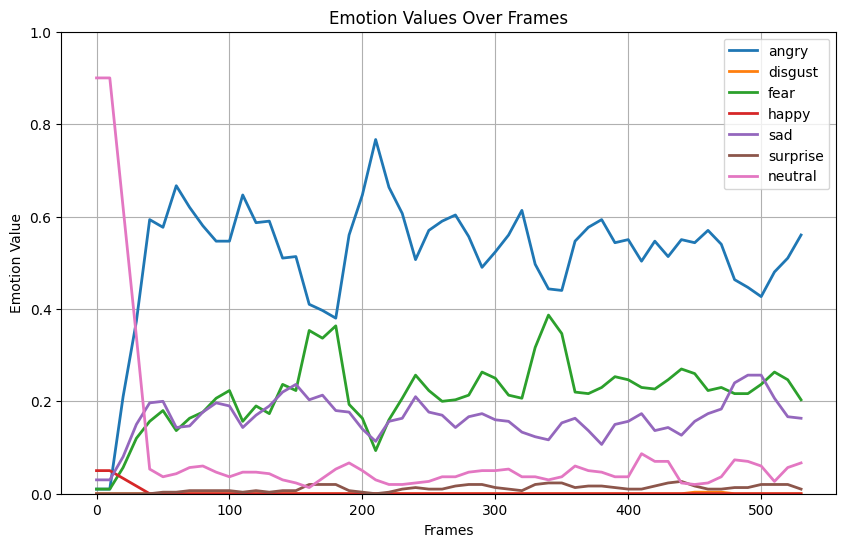

In [20]:
plt.figure(figsize=(10, 6)) 

# num_values = len(next(iter(emotions_dict.values())))
# time_steps = [i * 10 for i in range(num_values)]
# time_steps = range(len(next(iter(emotions_dict.values()))))

downsample_factor = 10
window_size = 3

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')


for emotion, values in emotions_dict.items():
    print(emotion, np.mean(values))
    downsampled_values = values[::downsample_factor]
    time_steps = [i * downsample_factor for i in range(len(downsampled_values))]
    # plt.plot(time_steps, downsampled_values, label=emotion)
    if len(downsampled_values) >= window_size:
        ma_values = moving_average(downsampled_values, window_size)
        ma_time_steps = time_steps[:len(ma_values)]
        plt.plot(ma_time_steps, ma_values, label=emotion, linewidth=2)

plt.xlabel('Frames')
plt.ylabel('Emotion Value')
plt.title('Emotion Values Over Frames')
plt.ylim(0, 1)  
plt.legend()  
plt.grid(True)  

plt.show()
